In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [80]:
df = pd.read_csv('HR_comma_sep.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [82]:
groupBy_left = df.groupby('left').mean();
groupBy_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


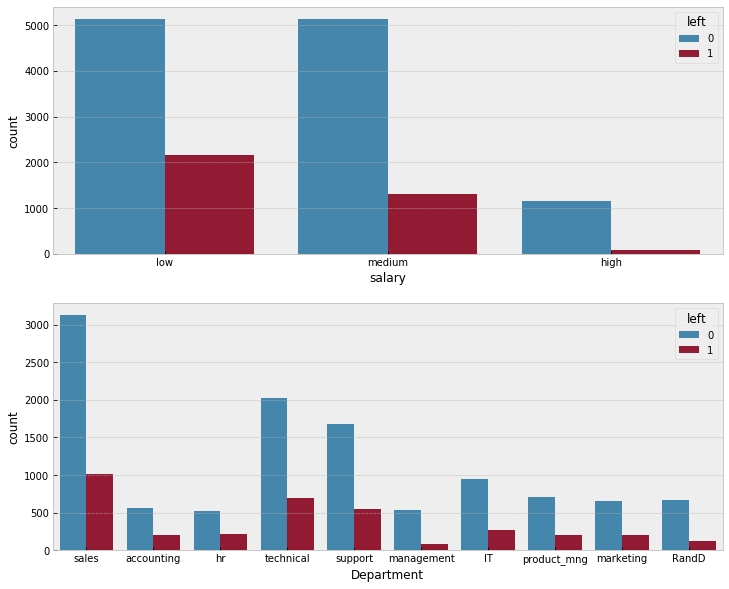

In [83]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize =(12,10))
sns.countplot(x = 'salary', hue='left', data = df, ax = axis[0])
sns.countplot(x = 'Department', hue ='left', data = df, ax = axis[1])

In [84]:
# From the data analysis so far we can conclude that 
# we will use following variables as dependant variables in our model
#**Satisfaction Level**
#**Average Monthly Hours**
#**Promotion Last 5 Years**
#**Salary**


In [85]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [86]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years','salary']]

In [87]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [88]:
dummies = pd.get_dummies(subdf['salary'])

In [89]:
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [90]:
dffinal = pd.concat([subdf, dummies], axis=1)
dffinal.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [96]:
X=dffinal.drop('salary',axis='columns')
Y = df['left']
X.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1


In [97]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
model.coef_

array([[-3.72668487e+00,  2.51277651e-03, -1.36257295e+00,
        -1.04150552e+00,  7.51276949e-01,  2.77070210e-01]])

In [104]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
model.predict_proba(X_test)

array([[0.9138311 , 0.0861689 ],
       [0.90228995, 0.09771005],
       [0.66067732, 0.33932268],
       ...,
       [0.81503613, 0.18496387],
       [0.92415427, 0.07584573],
       [0.8169862 , 0.1830138 ]])

In [108]:
model.score(X_test,Y_test)

0.7746666666666666